In [ ]:
# left = df[df['left']==1]
#newdf.groupby('left').mean()
# crosstab to compare two values

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
left = df[df['left']==1]
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
left.shape

(3571, 10)

In [11]:
retention = df[df['left'] == 0]
retention.shape

(11428, 10)

In [12]:
newdf = df.drop(columns = ['Department','salary'])
newdf

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [13]:
newdf.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [15]:
# inputs taken from average - employees left is based on satisfaction,average_montly_hours and promotion
x = df.drop(columns = ['last_evaluation','number_project','time_spend_company','Work_accident','Department','salary','left'])
y = df['left']
x

,satisfaction_level,average_montly_hours,promotion_last_5years
0,0.38,157,0
1,0.80,262,0
2,0.11,272,0
3,0.72,223,0
4,0.37,159,0
...,...,...,...
14994,0.40,151,0
14995,0.37,160,0
14996,0.37,143,0
14997,0.11,280,0


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression()


In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,random_state = 2)
model.fit(X_train,Y_train)

LogisticRegression()

In [19]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [23]:
acc = model.score(X_test,Y_test)
acc

0.7634666666666666

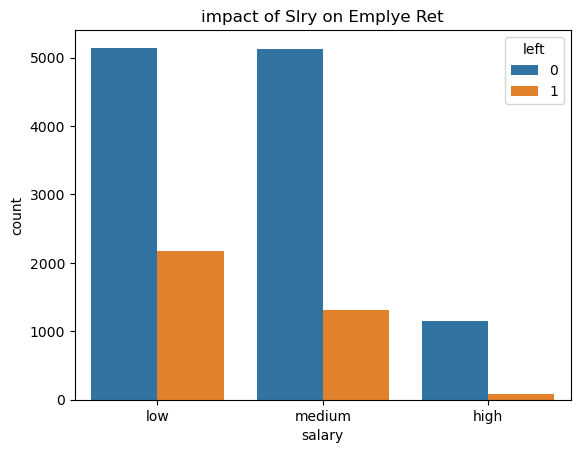

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(x='salary', hue='left', data=df)
plt.title('impact of Slry on Emplye Ret')
plt.xlabel('salary')
plt.ylabel('count')
plt.show()

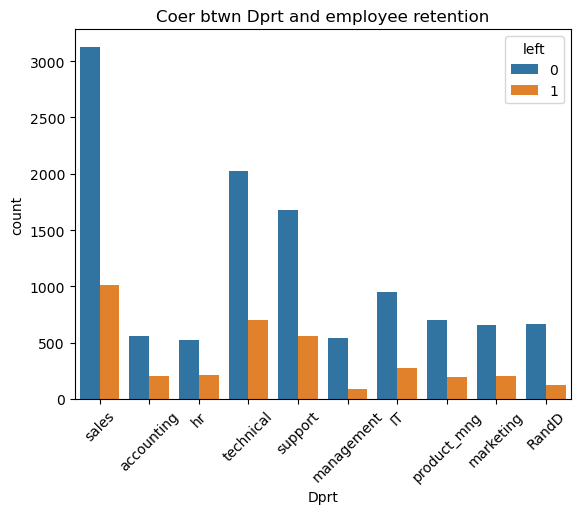

In [28]:
sns.countplot(x='Department', hue='left', data=df)
plt.title('Coer btwn Dprt and employee retention')
plt.xlabel('Dprt')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()